# Prep of BitStamp(BTC_USD_1min)

In [394]:
import pandas as pd
import numpy as np
from datetime import datetime
from tqdm import tqdm

In [395]:
btc_usd_1min = pd.read_csv('../COINAPI/bitcoin-historical-data/bitstampUSD_1-min_data_2012-01-01_to_2019-03-13.csv')

In [396]:
btc_usd_1min['date'] = btc_usd_1min['Timestamp'].apply(lambda x :
                                                       datetime.utcfromtimestamp(int(x))
                                                      )
btc_usd_1min['date_str'] = btc_usd_1min['date'].astype(str)

In [226]:
btc_usd_1min['date_str'][0]

'2011-12-31 07:52:00'

In [232]:

def make_integer_time_index(time_exch, config=None):
    '''
    Creates integer time index from 'time_exchange' column returned in format of Coin API
    
    This function is designed to be called with pd.Series.apply(lambda x: func(x, config=config)), x is the value of 'time_exch' passed on by apply function,
    while what kind of index will be created should be specified by user via 'config' param.
    
        args:
            
            * time_exch: this is passed by .apply function from pandas
            * config (str): user specifies which time index to create  as '[agg_type]_[agg_freq]':
                - agg_type: 
                    = cycle:  only return the cycle. ( example if freq is day, then return day of the month example: 1, 2, 24, 30)
                    = bin: concatenate starting from largest freq(year) until specified freq (allows easy binning with this freq, hence the name 'bin')
    '''
    
    agg_type, agg_freq  = config.split('_')
    
    t = str(time_exch).split(' ')

    year, month, day = t[0].split('-')
    hour, minute, second = t[1].split('.')[0].split(':')
    ymd_hms = { 'year': year, 'month':month, 'day': day, 'hour': hour, 'minute': minute, 'second': second  }

     
    if agg_type == 'cycle':
        return(int(ymd_hms[agg_freq]))
    
    elif agg_type == 'bin':
        bin_time = ''
        for freq, freq_value in ymd_hms.items():
            bin_time += freq_value
            if freq == agg_freq:
                break
        return(int(bin_time))

    
def make_all_time_indexes(df):             
    time_agg_inds = []
    
    for agg_type in ['cycle', 'bin']:
        for agg_freq in ['year','month', 'day']:
            print(agg_type, agg_freq)
            if agg_type == 'cycle':
                config = str(agg_type+'_'+agg_freq)
                df[agg_freq] = df['date_str'].apply(lambda x: make_integer_time_index(x, config=config))
                time_agg_inds.append(agg_freq)
            else:
                config = str('bin_'+agg_freq)
                df['time_'+agg_freq] = df['date_str'].apply(lambda x: make_integer_time_index(x, config=config))
                time_agg_inds.append('time_'+agg_freq)

    return df
    

In [ ]:
btc_usd_1min['Volume_(Currency)_normal'] = btc_usd_1min['Volume_(Currency)']/ btc_usd_1min['Volume_(Currency)'].max()

In [325]:
btc_usd_1min.head()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price,date,year,...,hour,minute,second,time_month,time_day,time_hour,time_minute,isna,date_str,time_year
0,1325317920,4.39,4.39,4.39,4.39,0.455581,2.0,4.39,2011-12-31 07:52:00,2011,...,7,52,0,201112,20111231,201112317,20111231752,False,2011-12-31 07:52:00,2011
1,1325317980,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011-12-31 07:53:00,2011,...,7,53,0,201112,20111231,201112317,20111231753,True,2011-12-31 07:53:00,2011
2,1325318040,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011-12-31 07:54:00,2011,...,7,54,0,201112,20111231,201112317,20111231754,True,2011-12-31 07:54:00,2011
3,1325318100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011-12-31 07:55:00,2011,...,7,55,0,201112,20111231,201112317,20111231755,True,2011-12-31 07:55:00,2011
4,1325318160,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011-12-31 07:56:00,2011,...,7,56,0,201112,20111231,201112317,20111231756,True,2011-12-31 07:56:00,2011


In [233]:
btc_usd_1min = make_all_time_indexes(btc_usd_1min)

cycle year
cycle month
cycle day
bin year
bin month
bin day


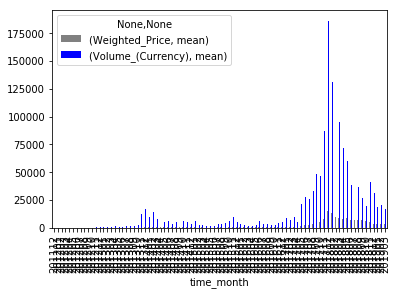

In [282]:
btc_usd_1min.groupby('time_month')[['Weighted_Price', 'Volume_(Currency)']].agg(['mean']).plot.bar(color=['grey', 'blue'])

In [305]:
btc_usd_1min.groupby('time_month')[['Weighted_Price']].mean()['Weighted_Price']

time_month
201112        4.471603
201201        6.345955
201202        5.228443
201203        4.984397
201204        4.995091
201205        5.046848
201206        6.047198
201207        7.907613
201208       10.984670
201209       11.435692
201210       11.586089
201211       11.307919
201212       13.167811
201301       15.806890
201302       26.805143
201303       60.495681
201304      127.481485
201305      117.780293
201306      106.525482
201307       85.326093
201308      104.600292
201309      124.966240
201310      153.706777
201311      532.941844
201312      795.146259
201401      820.097776
201402      657.512046
201403      591.475008
201404      461.292204
201405      490.389549
              ...     
201610      641.036916
201611      723.194034
201612      826.698833
201701      908.151806
201702     1060.662187
201703     1128.963271
201704     1208.992861
201705     1885.190125
201706     2619.194432
201707     2491.271488
201708     3834.673640
201709     4085.751829


In [390]:
from matplotlib import pyplot as plt
all_na = btc_usd_1min['Open'].isna().sum()
btc_usd_1min['isna'] = btc_usd_1min['Open'].isna()
monthly_na_shares = ((btc_usd_1min.groupby('time_month')[['isna']].count()-btc_usd_1min.groupby('time_month')[['isna']].sum())/42941.102273)[36:]
     
     
     

In [391]:
btc_usd_1min.groupby('time_month')[['isna']].count().mean()

isna    42941.102273
dtype: float64

In [392]:

years = list(set([str(m)[:4] for m in monthly_na_shares.index if str(m)[-2:]=='01']))
years.sort()

offset = len([m for m in monthly_na_shares.index if m < int(min(years)+'00')]) 

xticks = [12*i for i in range(len(years))]
print(years, xticks, offset)

['2015', '2016', '2017', '2018', '2019'] [0, 12, 24, 36, 48] 1


No handles with labels found to put in legend.


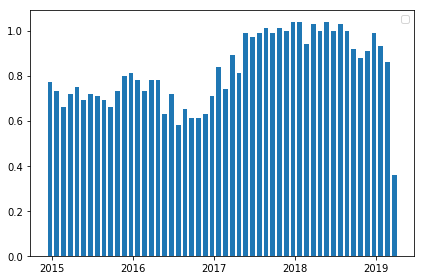

In [393]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np



nas = monthly_na_shares['isna'].apply(lambda x: round(x*1, 2)).values


x = np.arange(len(monthly_na_shares))  # the label locations
width = 0.7 # the width of the bars

fig, ax = plt.subplots()
# ax.set_ylim(0, 5)
rects1 = ax.bar(x - width/2, nas, width, align='center')
# rects2 = ax.bar(x + width/2, women_means, width, label='Women')


ax.set_xticks(xticks)
ax.set_xticklabels(years)
# plt.xticks(rotation=90)
plt.xticks()
plt.xticks(size=10)
ax.legend()


# def autolabel(rects):
#     """Attach a text label above each bar in *rects*, displaying its height."""
#     for rect in rects:
#         height = rect.get_height()
#         ax.annotate('{}'.format(height),
#                     xy=(rect.get_x() + rect.get_width() / 2, height),
#                     xytext=(0, 3),  # 3 points vertical offset
#                     textcoords="offset points",
#                     ha='center', va='bottom')


# autolabel(rects1)
# autolabel(rects2)

fig.tight_layout()

plt.show()

In [388]:
monthly_na_shares.index

Int64Index([201112, 201201, 201202, 201203, 201204, 201205, 201206, 201207,
            201208, 201209, 201210, 201211, 201212, 201301, 201302, 201303,
            201304, 201305, 201306, 201307, 201308, 201309, 201310, 201311,
            201312, 201401, 201402, 201403, 201404, 201405, 201406, 201407,
            201408, 201409, 201410, 201411],
           dtype='int64', name='time_month')

In [291]:
list(btc_usd_1min['year'].unique())

[2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019]